In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

# Read data from mesa data: 
a = pd.read_excel('ONe6040_helm_update.xlsx')

In [3]:
r_cm = np.array(a["radius_cm"])
rho = np.power(10,np.array(a["logRho"]))
temp = np.array(a["temperature"])
pressure = np.array(a['pressure'])

In [4]:
data = pd.DataFrame(columns = ['r_center [cm]'],data = r_cm[::-1])
data['density [g/cm3]'] = rho[::-1]
data['temperature [K]'] = temp[::-1]
data['pressure'] = pressure[::-1]
data['neon20'] = np.array(a['ne20'])[::-1]
data['oxygen16'] =  np.array(a['o16'])[::-1]
data['oxygen20'] =  np.array(a['o20'])[::-1]
data['magnesium24'] =  np.array(a['mg24'])[::-1]
data['fluorine20'] =  np.array(a['f20'])[::-1]
data['helium4'] =  np.array(a['he4'])[::-1]
data['aluminum27'] = 0.0
data['silicon28'] =  np.array(a['si28'])[::-1]
data['sulfur32'] = 0.0
data['phosphorus31'] = 0.0
data['hydrogen1'] =  np.array(a['h1'])[::-1]

In [5]:
data['conv_vel'] =  np.array(a['conv_vel'])[::-1]
data['velocity'] =  np.array(a['velocity'])[::-1]
data['zone'] =  np.array(a['zone'])[::-1]

In [6]:
for item in a.columns:
    print(item)

zone
logT
logRho
logP
logR
luminosity
conv_vel
grav
eps_grav
log_abs_eps_grav_dm_div_L
signed_log_eps_grav
net_energy
eps_nuc_plus_nuc_neu
signed_log_power
velocity
entropy
mixing_type
csound
v_div_cs
scale_height
eta
mu
dm
logdq
dq_ratio
q
log_q
radius
radius_cm
rmid
temperature
tau
logtau
pressure
pgas_div_ptotal
logPgas
logE
grada
cv
cp
gamma3
gam
free_e
chiRho
chiT
x_mass_fraction_H
y_mass_fraction_He
z_mass_fraction_metals
abar
zbar
ye
log_opacity
eps_nuc
log_abs_eps_nuc
d_lnepsnuc_dlnd
d_lnepsnuc_dlnT
non_nuc_neu
mlt_mixing_length
mlt_mixing_type
gradT_sub_grada
log_mlt_Gamma
super_ad
log_D_mix
log_conv_vel
conv_vel_div_csound
log_mlt_D_mix
pressure_scale_height
log_D_conv
log_D_soft
log_D_semi
log_D_ovr
log_D_thrm
log_D_minimum
gradT
gradr
gradL
dlnd
dlnT
mass
logxq
logxm
x
y
z
h1
he3
he4
c12
n14
o16
o20
f20
f23
ne20
ne22
ne23
ne24
ne25
na23
na24
na25
mg24
mg25
si28
pp
cno
tri_alfa
burn_c
burn_n
burn_o
burn_ne
burn_na
burn_mg
burn_si
burn_s
burn_ar
burn_ca
burn_ti
burn_cr
burn_f

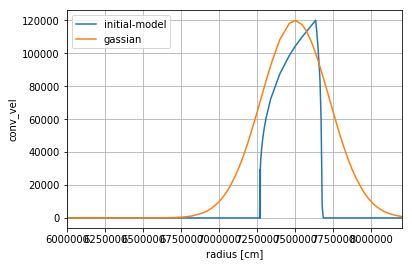

In [7]:
field = 'conv_vel'
vel = np.array([0]*data.shape[0])
vel = 120000.*np.exp(-(data['r_center [cm]']-7.5e6)**2/100000000000)
plt.plot(data['r_center [cm]'],data[field],label='initial-model')
plt.plot(data['r_center [cm]'],vel,label="gassian")
plt.xlim(0.6e7,0.82e7)
#plt.ylim(5.e8,11.5e8)
plt.grid()
plt.xlabel("radius [cm]")
plt.ylabel(field)
plt.legend()
plt.savefig("velocity.png")

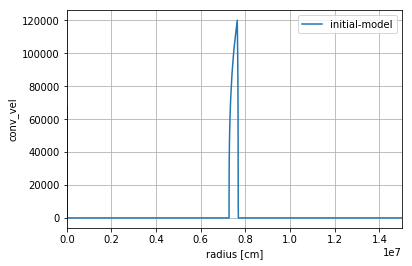

In [8]:
field = 'conv_vel'
plt.plot(data['r_center [cm]'],np.array(a[field])[::-1],label='initial-model')
plt.xlim(0,1.5e7)
#plt.ylim(5.e8,11.5e8)
plt.grid()
plt.xlabel("radius [cm]")
plt.ylabel(field)
plt.legend()
plt.show()

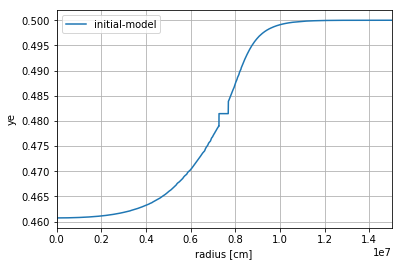

In [9]:
field = 'ye'
plt.plot(data['r_center [cm]'],np.array(a[field])[::-1],label='initial-model')
plt.xlim(0,1.5e7)
#plt.ylim(5.e8,11.5e8)
plt.grid()
plt.xlabel("radius [cm]")
plt.ylabel(field)
plt.legend()
plt.show()

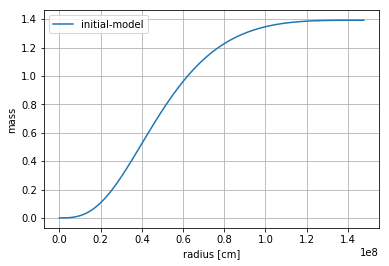

In [10]:
field = 'mass'
plt.plot(data['r_center [cm]'],np.array(a[field])[::-1],label='initial-model')
#plt.xlim(0,1.5e7)
#plt.ylim(5.e8,11.5e8)
plt.grid()
plt.xlabel("radius [cm]")
plt.ylabel(field)
plt.legend()
plt.show()

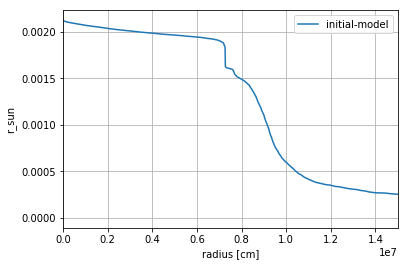

In [12]:
R = np.power(10,np.array(a["logR"]))
plt.plot(data['r_center [cm]'],R,label='initial-model')
plt.xlim(0,1.5e7)
#plt.ylim(5.e8,11.5e8)
plt.grid()
plt.xlabel("radius [cm]")
plt.ylabel(field)
plt.legend()
plt.show()

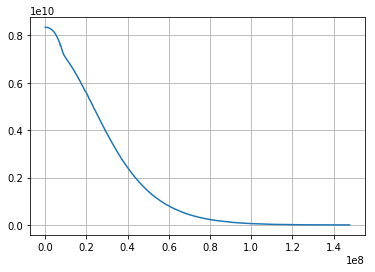

In [18]:
plt.plot(data['r_center [cm]'],data["density [g/cm3]"])
plt.grid()

In [22]:
df = pd.read_csv('../../../test/png/no_use/20veAMR0000000.csv')

In [23]:
df.head()

,x,Hnuc,MachNumber,Pi,S,X(al27),X(f20),X(h1),X(he4),X(mg24),...,tfromp,thermal,tpert,velx,vely,velz,vort,w0x,w0y,w0z
0,6835.9375,0.0,1.541191e-09,9.253826e+20,-4.928389e-12,1.000000e-20,5.158019e-12,1.000000e-20,1.000000e-20,8.908948e-13,...,6.566138e+08,0.0,0.000000,0.604336,-1.362490,0.758154,2.747350e-08,0.0,0.0,0.0
1,20507.8125,0.0,2.204497e-09,9.253823e+20,-9.854816e-12,1.000000e-20,5.161383e-12,1.000000e-20,1.000000e-20,8.922033e-13,...,6.566176e+08,0.0,0.000000,1.813498,-1.363019,0.758184,7.404908e-08,0.0,0.0,0.0
2,34179.6875,0.0,3.134625e-09,9.253819e+20,-1.968300e-15,1.000000e-20,5.168113e-12,1.000000e-20,1.000000e-20,8.948202e-13,...,6.566250e+08,0.0,0.018378,3.023556,-1.361392,0.756768,3.431551e-07,0.0,0.0,0.0
3,47851.5625,0.0,4.162951e-09,9.253812e+20,-4.928371e-12,1.000000e-20,5.178207e-12,1.000000e-20,1.000000e-20,8.987457e-13,...,6.566363e+08,0.0,-0.002829,4.235511,-1.372128,0.761876,1.368751e-06,0.0,0.0,0.0
4,61523.4375,0.0,5.214732e-09,9.253803e+20,-4.928354e-12,1.000000e-20,5.191666e-12,1.000000e-20,1.000000e-20,9.039800e-13,...,6.566512e+08,0.0,-0.002130,5.449910,-1.330077,0.737634,4.002605e-06,0.0,0.0,0.0


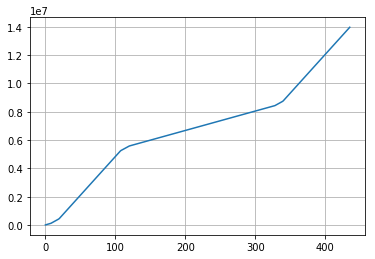

In [27]:
plt.plot(df.x)
plt.grid()

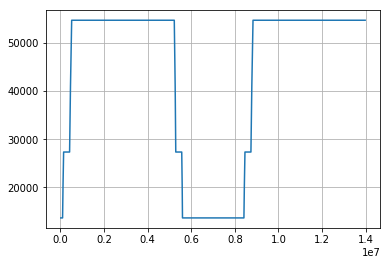

In [48]:
plt.plot(df.x,df['x']-df['x'].shift())
plt.grid()

(0.4, 1.0)

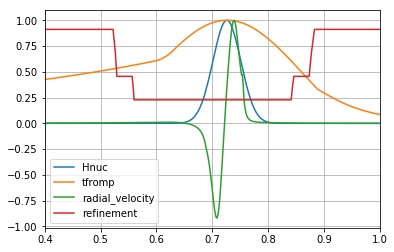

In [56]:
plt.plot(df.x/1e7,df.Hnuc/max(df.Hnuc), label="Hnuc")
plt.plot(df.x/1e7,(df.tfromp-min(df.tfromp))/(max(df.tfromp)-min(df.tfromp)), label="tfromp")
plt.plot(df.x/1e7,df.radial_velocity/max(df.radial_velocity), label="radial_velocity")
plt.plot(df.x/1e7,(df['x']-df['x'].shift())/60000,label="refinement")
plt.legend()
plt.grid()
plt.xlim(0.4,1.)

In [32]:
df[df.Hnuc==max(df.Hnuc)]

,x,Hnuc,MachNumber,Pi,S,X(al27),X(f20),X(h1),X(he4),X(mg24),...,tfromp,thermal,tpert,velx,vely,velz,vort,w0x,w0y,w0z
243,7.266602e+06,2.153696e+13,0.00055,1.488907e+21,0.000009,1.000000e-20,5.858846e-07,1.000000e-20,3.122153e-17,1.811707e-07,...,1.450026e+09,0.0,-0.000752,602357.132175,-22556.892021,-60784.537887,2.945257,0.0,0.0,0.0


(0.5, 0.9)

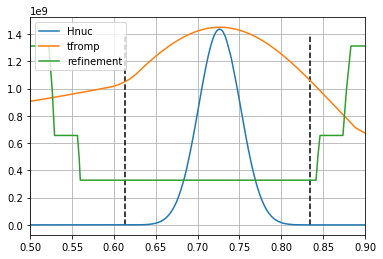

In [85]:
plt.plot(df.x/1e7,df.Hnuc/15000, label="Hnuc")
plt.plot(df.x/1e7,df.tfromp, label="tfromp")
#plt.plot(df.x/1e7,df.radial_velocity/max(df.radial_velocity), label="radial_velocity")
plt.plot(df.x/1e7,(df['x']-df['x'].shift())*24000,label="refinement")
plt.vlines(6.131836e-1,ymin=0,ymax=1.4e9,linestyles="--")
plt.vlines(8.346680e-1,ymin=0,ymax=1.4e9,linestyles="--")
plt.legend()
plt.grid()
plt.xlim(0.5,0.9)

(1000000000.0, 1000000000000000.0)

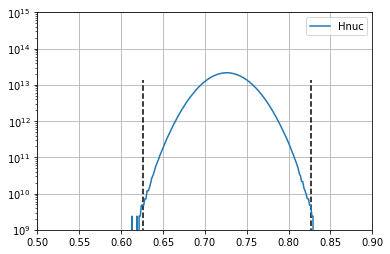

In [100]:
#df[df.tfromp>1.05e9]
plt.semilogy(df.x/1e7,df.Hnuc, label="Hnuc")
#plt.plot(df.x/1e7,df.tfromp, label="tfromp")
#plt.plot(df.x/1e7,df.radial_velocity/max(df.radial_velocity), label="radial_velocity")
#plt.plot(df.x/1e7,(df['x']-df['x'].shift())*24000,label="refinement")
plt.vlines(6.254883e-1,ymin=0,ymax=1.4e13,linestyles="--")
plt.vlines(8.264648e-1,ymin=0,ymax=1.4e13,linestyles="--")
plt.legend()
plt.grid()
plt.xlim(0.5,0.9)
plt.ylim(10e8,10e14)

In [97]:
df[df.tfromp>1.1e9]

,x,Hnuc,MachNumber,Pi,S,X(al27),X(f20),X(h1),X(he4),X(mg24),...,tfromp,thermal,tpert,velx,vely,velz,vort,w0x,w0y,w0z
169,6.254883e+06,4.760075e+09,1.609650e-05,5.889603e+20,2.299489e-09,1.000000e-20,4.444082e-07,1.000000e-20,2.368231e-17,1.374226e-07,...,1.101111e+09,0.0,-0.000088,17549.843963,16.252428,96.818113,0.000003,0.0,0.0,0.0
170,6.268555e+06,4.760075e+09,1.587195e-05,5.782238e+20,2.319607e-09,1.000000e-20,4.477266e-07,1.000000e-20,2.385915e-17,1.384487e-07,...,1.108101e+09,0.0,0.000484,17307.096792,22.964946,109.556345,0.000003,0.0,0.0,0.0
171,6.282227e+06,7.140112e+09,1.561029e-05,5.670628e+20,3.326659e-09,1.000000e-20,4.509999e-07,1.000000e-20,2.403358e-17,1.394609e-07,...,1.116202e+09,0.0,0.000371,17023.886683,30.299584,123.193196,0.000003,0.0,0.0,0.0
172,6.295898e+06,7.140112e+09,1.530874e-05,5.554586e+20,3.354420e-09,1.000000e-20,4.542731e-07,1.000000e-20,2.420801e-17,1.404731e-07,...,1.124303e+09,0.0,0.000359,16697.069569,38.302520,137.782104,0.000004,0.0,0.0,0.0
173,6.309570e+06,1.190019e+10,1.496424e-05,5.433933e+20,5.346865e-09,1.000000e-20,4.575337e-07,1.000000e-20,2.438177e-17,1.414813e-07,...,1.132373e+09,0.0,0.000519,16323.273514,47.034740,153.384106,0.000005,0.0,0.0,0.0
174,6.323242e+06,1.190019e+10,1.457346e-05,5.308500e+20,5.380318e-09,1.000000e-20,4.607348e-07,1.000000e-20,2.455235e-17,1.424712e-07,...,1.140295e+09,0.0,-0.000649,15898.877651,56.560661,170.063125,0.000006,0.0,0.0,0.0
175,6.336914e+06,1.428022e+10,1.413290e-05,5.178094e+20,6.434642e-09,1.000000e-20,4.639358e-07,1.000000e-20,2.472293e-17,1.434610e-07,...,1.148217e+09,0.0,0.000684,15419.990722,66.952518,187.887792,0.000008,0.0,0.0,0.0
176,6.350586e+06,1.904030e+10,1.363876e-05,5.042512e+20,8.438990e-09,1.000000e-20,4.671296e-07,1.000000e-20,2.489313e-17,1.444486e-07,...,1.156121e+09,0.0,-0.002174,14882.425998,78.290802,206.931642,0.000010,0.0,0.0,0.0
177,6.364258e+06,2.618041e+10,1.308691e-05,4.901556e+20,1.146361e-08,1.000000e-20,4.702456e-07,1.000000e-20,2.505918e-17,1.454122e-07,...,1.163833e+09,0.0,-0.000306,14281.672629,90.665751,227.273747,0.000012,0.0,0.0,0.0
178,6.377930e+06,3.094049e+10,1.247299e-05,4.755028e+20,1.343426e-08,1.000000e-20,4.733616e-07,1.000000e-20,2.522523e-17,1.463757e-07,...,1.171545e+09,0.0,-0.000950,13612.862768,104.178933,248.999395,0.000016,0.0,0.0,0.0
